In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import islice

In [2]:
G = nx.read_edgelist(path = "Network-Analysis-Project/citation.edgelist", create_using=nx.DiGraph())
#G = nx.read_edgelist(path = "test.edgelist", create_using=nx.DiGraph())

In [3]:
# compute centrality (degree, betweenness, closeness) of nodes
def centrality(G, k = None, normalized = True, distance=None, seed=None):
    centrality = {}
    centrality["degree"] = nx.degree_centrality(G)
    centrality["inDegree"] = nx.in_degree_centrality(G)
    centrality["outDegree"] = nx.out_degree_centrality(G)
    centrality["betweeness"] = nx.betweenness_centrality(G, k=k, normalized=normalized, seed=seed)
    centrality["closeness"] = nx.closeness_centrality(G, distance=distance)
    return centrality


In [4]:
centrality = centrality(G, seed = 123)

In [6]:
len(centrality["outDegree"])

27770

In [ ]:
# 

In [8]:
import pickle
pickle.dump( centrality, open( "centrality.pkl", "wb" ) )

In [9]:
def getModularity(gn, max_iter = 5):    
    modularity = []
    gn_list = []
    for communities in islice(gn, max_iter):
        gn_list.append(tuple(sorted(c) for c in communities))
        
    k = 0
    while k < max_iter: 
        gn_communities = gn_list[k]
        mod = nx.algorithms.community.modularity(G, gn_communities)
        modularity.append(mod)
        k = k + 1
    return(modularity)            

In [10]:
# Graph partition
gn_generator = nx.algorithms.community.centrality.girvan_newman(G)

In [ ]:
gn_generator = nx.algorithms.community.centrality.girvan_newman(G)
modularity = getModularity(gn_generator)
mod_best = max(modularity) 

In [31]:
# modularity.index(mod_best)

4

In [ ]:
gn_communities_best = next(islice(gn_generator, modularity.index(mod_best),None) )
    
gn_dict_communities = {}
for i, c in enumerate(gn_communities_best):
    print ("Community {}".format(i))
    for node in c:
        gn_dict_communities[node] = i + 1
        
for node in G:
    if node not in gn_dict_communities.keys():
        gn_dict_communities[node] = -1


/home/kaizhang/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/kaizhang/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


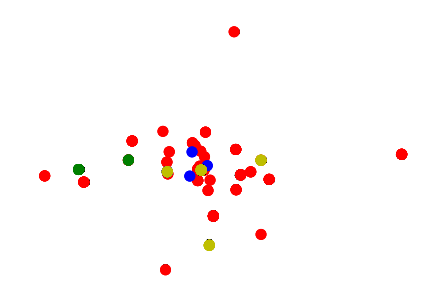

In [50]:
from matplotlib.colors import ListedColormap
nx.draw(G, with_labels=False, node_size=100, node_color=list(gn_dict_communities.values()), pos=nx.spectral_layout(G), cmap = ListedColormap(['r','b','g', 'y']))

#gn_pos = community_layout(G, gn_dict_communities) # Manually creating layout
#from matplotlib import cm
#gn_colors = []
#for node in G.nodes:
#    gn_colors.append(cm.Set1(gn_dict_communities[node]))
    
#plt.figure(figsize=(10,10))
#nx.draw_networkx_nodes(G, gn_pos, node_color=gn_colors, node_size=100)
#nx.draw_networkx_edges(G, gn_pos, alpha=0.7)
#plt.axis('off')
#plt.show()